In [1]:
import pandas as pd

from chembl_webresource_client.new_client import new_client

In [2]:
target = new_client.target

target_query = target.search('FGFR1')

targets = pd.DataFrame.from_dict(target_query)

In [3]:
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P16092', 'xref_name': None, 'xre...",Mus musculus,Fibroblast growth factor receptor 1,13.0,False,CHEMBL3960,"[{'accession': 'P16092', 'component_descriptio...",SINGLE PROTEIN,10090
1,[],Rattus norvegicus,Fibroblast growth factor receptor 1,13.0,False,CHEMBL4523276,"[{'accession': 'Q04589', 'component_descriptio...",SINGLE PROTEIN,10116
2,"[{'xref_id': 'P11362', 'xref_name': None, 'xre...",Homo sapiens,Fibroblast growth factor receptor 1,12.0,False,CHEMBL3650,"[{'accession': 'P11362', 'component_descriptio...",SINGLE PROTEIN,9606
3,[],Homo sapiens,VEGF-receptor 2 and Fibroblast growth factor r...,9.0,False,CHEMBL2111439,"[{'accession': 'P35968', 'component_descriptio...",PROTEIN FAMILY,9606
4,[],Homo sapiens,Fibroblast growth factor receptor,8.0,False,CHEMBL2095217,"[{'accession': 'P22607', 'component_descriptio...",PROTEIN FAMILY,9606
5,[],Mus musculus,Fibroblast growth factor receptor,8.0,False,CHEMBL2111391,"[{'accession': 'P21803', 'component_descriptio...",PROTEIN FAMILY,10090
6,[],Homo sapiens,Centrosomal protein 43/RET,8.0,False,CHEMBL4523602,"[{'accession': 'P07949', 'component_descriptio...",CHIMERIC PROTEIN,9606


In [4]:
selected_target = targets.target_chembl_id[2]

selected_target

'CHEMBL3650'

In [5]:
activity = new_client.activity

In [16]:
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

df = pd.DataFrame.from_dict(res)

In [18]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,78009,[],CHEMBL678670,Evaluated for inhibitory activity towards Fibr...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Fibroblast growth factor receptor 1,9606,None,None,IC50,uM,UO_0000065,None,1.35
1,None,79178,[],CHEMBL678670,Evaluated for inhibitory activity towards Fibr...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Fibroblast growth factor receptor 1,9606,None,None,IC50,uM,UO_0000065,None,1.08
2,None,80320,[],CHEMBL678670,Evaluated for inhibitory activity towards Fibr...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Fibroblast growth factor receptor 1,9606,None,None,IC50,uM,UO_0000065,None,17.5
3,None,83549,[],CHEMBL678670,Evaluated for inhibitory activity towards Fibr...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Fibroblast growth factor receptor 1,9606,None,None,IC50,uM,UO_0000065,None,17.7
4,None,84546,[],CHEMBL678670,Evaluated for inhibitory activity towards Fibr...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Fibroblast growth factor receptor 1,9606,None,None,IC50,uM,UO_0000065,None,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4325,None,20681258,[],CHEMBL4623164,Inhibition of N-terminal GST fused human recom...,B,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Fibroblast growth factor receptor 1,9606,None,None,IC50,nM,UO_0000065,None,99.0
4326,None,20711794,[],CHEMBL4629241,Inhibition of N-terminal GST-tagged human FGFR...,B,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Fibroblast growth factor receptor 1,9606,None,None,IC50,nM,UO_0000065,None,40.0
4327,None,20711817,[],CHEMBL4629241,Inhibition of N-terminal GST-tagged human FGFR...,B,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Fibroblast growth factor receptor 1,9606,None,None,IC50,nM,UO_0000065,None,2.1
4328,Not Active,20758217,[],CHEMBL4509064,Bayer in-house kinase assay with FGFR1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Fibroblast growth factor receptor 1,9606,None,None,IC50,µM,None,None,10.0


In [19]:
df.to_csv('/Users/mrinalmishra/Documents/drug_discovery/FGFR1_01_bioactivity_data_raw.csv', index=False)

In [20]:
df2 = df[df.standard_value.notna()]

df2 = df2[df.canonical_smiles.notna()]

#Extracting rows with unique canonical_smiles

len(df2.canonical_smiles.unique())

/Users/mrinalmishra/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


2731

In [21]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])

#Data pre-processing of the bioactivity data
#Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame

selection = ['molecule_chembl_id','canonical_smiles','standard_value']

df3 = df2_nr[selection]

df3.to_csv('/Users/mrinalmishra/Documents/drug_discovery/FGFR1_02_bioactivity_data_preprocessed.csv', index=False)


In [22]:
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL432941,COc1cccc(-c2ccc3c(c2)NC(=O)/C3=C\c2[nH]c3c(c2C...,1350.0
1,CHEMBL420609,COc1ccc2c(c1)NC(=O)/C2=C\c1[nH]c2c(c1CCC(=O)O)...,1080.0
2,CHEMBL419682,COc1cccc(-c2ccc3c(c2)NC(=O)/C3=C\c2cc3c([nH]2)...,17500.0
3,CHEMBL88462,COc1ccccc1-c1ccc2c(c1)NC(=O)/C2=C\c1cc2c([nH]1...,17700.0
4,CHEMBL431996,O=C(O)CCc1c(/C=C2\C(=O)Nc3ccc(C(=O)O)cc32)[nH]...,220.0
...,...,...,...
4324,CHEMBL4644718,COC(=O)c1ccc2c(c1)NC(=O)/C2=C(\Nc1ccc(-n2c(C)c...,23.0
4326,CHEMBL4641667,CCNS(=O)(=O)c1ccccc1Nc1ncnc(Nc2ccc(N3CCC(N4CCN...,40.0
4327,CHEMBL4642080,CCNS(=O)(=O)c1ccccc1Nc1nc(Nc2ccc(N3CCC(N4CCN(C...,2.1
4328,CHEMBL3907057,Cc1cc(C)c(-n2ccn3nc(-c4cccnc4)cc23)cc1NC(=O)c1...,10.0


In [23]:
df4 = pd.read_csv('/Users/mrinalmishra/Documents/drug_discovery/FGFR1_02_bioactivity_data_preprocessed.csv')

bioactivity_threshold = []

for i in df4.standard_value:
    if float(i) >= 10000:
        bioactivity_threshold.append("inactive")
    elif float(i) <= 1000:
        bioactivity_threshold.append("active")
    else:
        bioactivity_threshold.append("intermediate")


bioactivity_class = pd.Series(bioactivity_threshold, name='class')

df5 = pd.concat([df4, bioactivity_class], axis=1)

df5.to_csv('/Users/mrinalmishra/Documents/drug_discovery/FGFR1_03_bioactivity_data_curated.csv', index=False)


In [24]:
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL432941,COc1cccc(-c2ccc3c(c2)NC(=O)/C3=C\c2[nH]c3c(c2C...,1350.0,intermediate
1,CHEMBL420609,COc1ccc2c(c1)NC(=O)/C2=C\c1[nH]c2c(c1CCC(=O)O)...,1080.0,intermediate
2,CHEMBL419682,COc1cccc(-c2ccc3c(c2)NC(=O)/C3=C\c2cc3c([nH]2)...,17500.0,inactive
3,CHEMBL88462,COc1ccccc1-c1ccc2c(c1)NC(=O)/C2=C\c1cc2c([nH]1...,17700.0,inactive
4,CHEMBL431996,O=C(O)CCc1c(/C=C2\C(=O)Nc3ccc(C(=O)O)cc32)[nH]...,220.0,active
...,...,...,...,...
2726,CHEMBL4644718,COC(=O)c1ccc2c(c1)NC(=O)/C2=C(\Nc1ccc(-n2c(C)c...,23.0,active
2727,CHEMBL4641667,CCNS(=O)(=O)c1ccccc1Nc1ncnc(Nc2ccc(N3CCC(N4CCN...,40.0,active
2728,CHEMBL4642080,CCNS(=O)(=O)c1ccccc1Nc1nc(Nc2ccc(N3CCC(N4CCN(C...,2.1,active
2729,CHEMBL3907057,Cc1cc(C)c(-n2ccn3nc(-c4cccnc4)cc23)cc1NC(=O)c1...,10.0,active


In [25]:
df = pd.read_csv('/Users/mrinalmishra/Documents/drug_discovery/FGFR1_03_bioactivity_data_curated.csv')


df_no_smiles = df.drop(columns='canonical_smiles')

smiles = []

for i in df.canonical_smiles.tolist():
    cpd = str(i).split('.')
    cpd_longest = max(cpd, key = len)
    smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)


In [26]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

def lipinski(smiles, verbose=False):
    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)
    baseData= np.arange(1,1)
    i=0
    for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
        row = np.array([desc_MolWt,desc_MolLogP,desc_NumHDonors,desc_NumHAcceptors])
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    return descriptors

df_lipinski = lipinski(df_clean_smiles.canonical_smiles)

df_combined = pd.concat([df,df_lipinski], axis=1)

In [27]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,442.515,5.07900,3.0,3.0
1,366.417,3.41200,3.0,3.0
2,370.452,5.06180,2.0,2.0
3,370.452,5.06180,2.0,2.0
4,380.400,3.10160,4.0,3.0
...,...,...,...,...
2726,561.686,5.25222,2.0,7.0
2727,581.747,2.88180,3.0,11.0
2728,759.934,4.75630,4.0,13.0
2729,558.536,7.58522,1.0,6.0


/Users/mrinalmishra/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/Users/mrinalmishra/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


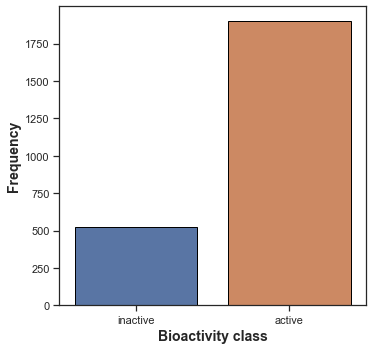

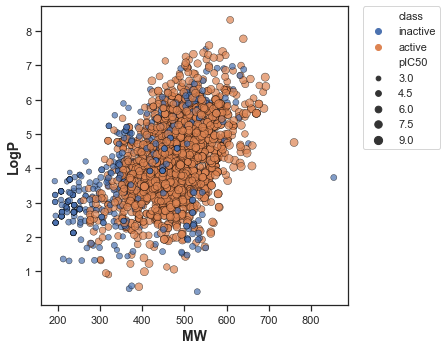

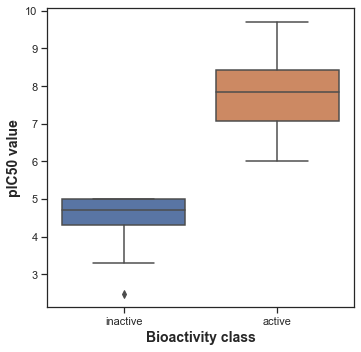

In [28]:
import numpy as np

def pIC50(input):
    pIC50 = []
    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))
    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
    return x
#Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative

def norm_value(input):
    norm = []
    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)
    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
    return x

df_norm = norm_value(df_combined)

df_final = pIC50(df_norm)

df_final.to_csv('/Users/mrinalmishra/Documents/drug_discovery/FGFR1_bioactivity_data_3class_pIC50.csv')

#Removing the 'intermediate' bioactivity class

df_2class = df_final[df_final['class'] != 'intermediate']

#Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')

plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('/Users/mrinalmishra/Documents/drug_discovery/plot_FGFR1_bioactivity_class.pdf')



#Scatter plot of MW versus LogP
#It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')

plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.savefig('/Users/mrinalmishra/Documents/drug_discovery/plot_FGFR1_MW_vs_LogP.pdf')

#Box plots
#pIC50 value

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')

plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('/Users/mrinalmishra/Documents/drug_discovery/plot_FGFR1_plot_ic50.pdf')

In [29]:
def mannwhitney(descriptor, verbose=False):
    from numpy.random import seed
    from numpy.random import randn
    from scipy.stats import mannwhitneyu
    seed(1)# seed the random number generator
    selection = [descriptor, 'class']# actives and inactives
    df = df_2class[selection]
    active = df[df['class'] == 'active']
    active = active[descriptor]
    selection = [descriptor, 'class']
    df = df_2class[selection]
    inactive = df[df['class'] == 'inactive']
    inactive = inactive[descriptor]
    stat, p = mannwhitneyu(active, inactive)# compare samples
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05 # interpret
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'
    results = pd.DataFrame({'Descriptor':descriptor,'Statistics':stat,'p':p,'alpha':alpha,'Interpretation':interpretation}, index=[0])
    filename = '/Users/mrinalmishra/Documents/drug_discovery/FGFR1_' + 'mannwhitneyu_' + descriptor + '.csv'
    results.to_csv(filename)
    return results

mannwhitney('pIC50')

Statistics=991984.000, p=0.000


,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,991984.0,6.354594e-269,0.05,Different distribution (reject H0)


Statistics=728025.000, p=0.000


,Descriptor,Statistics,p,alpha,Interpretation
0,MW,728025.0,2.454658e-60,0.05,Different distribution (reject H0)


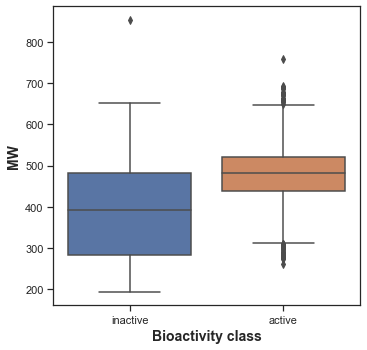

In [30]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')

plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('/Users/mrinalmishra/Documents/drug_discovery/FGFR1_plot_MW.pdf')

mannwhitney('MW')


Statistics=598675.500, p=0.000


,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,598675.5,4.140306e-13,0.05,Different distribution (reject H0)


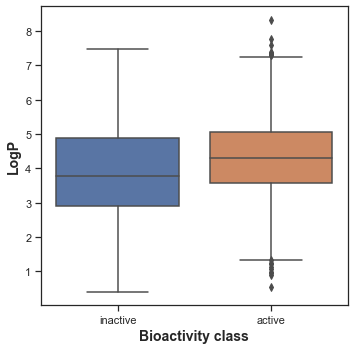

In [31]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')

plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('/Users/mrinalmishra/Documents/drug_discovery/FGFR1_plot_LogP.pdf')

mannwhitney('LogP')

Statistics=584313.500, p=0.000


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,584313.5,1.206313e-10,0.05,Different distribution (reject H0)


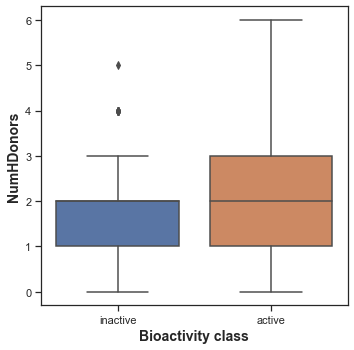

In [32]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')

plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('/Users/mrinalmishra/Documents/drug_discovery/FGFR1_plot_NumHDonors.pdf')

mannwhitney('NumHDonors')


Statistics=747971.500, p=0.000


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,747971.5,1.855937e-72,0.05,Different distribution (reject H0)


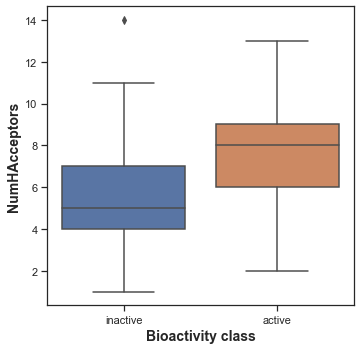

In [33]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')

plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('/Users/mrinalmishra/Documents/drug_discovery/FGFR1_plot_NumHAcceptors.pdf')

mannwhitney('NumHAcceptors')

In [1]:
import pandas as pd

In [2]:
df3 = pd.read_csv('/Users/mrinalmishra/Documents/drug_discovery/FGFR1_bioactivity_data_3class_pIC50.csv')

In [3]:
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL432941,COc1cccc(-c2ccc3c(c2)NC(=O)/C3=C\c2[nH]c3c(c2C...,intermediate,442.515,5.07900,3.0,3.0,5.869666
1,1,CHEMBL420609,COc1ccc2c(c1)NC(=O)/C2=C\c1[nH]c2c(c1CCC(=O)O)...,intermediate,366.417,3.41200,3.0,3.0,5.966576
2,2,CHEMBL419682,COc1cccc(-c2ccc3c(c2)NC(=O)/C3=C\c2cc3c([nH]2)...,inactive,370.452,5.06180,2.0,2.0,4.756962
3,3,CHEMBL88462,COc1ccccc1-c1ccc2c(c1)NC(=O)/C2=C\c1cc2c([nH]1...,inactive,370.452,5.06180,2.0,2.0,4.752027
4,4,CHEMBL431996,O=C(O)CCc1c(/C=C2\C(=O)Nc3ccc(C(=O)O)cc32)[nH]...,active,380.400,3.10160,4.0,3.0,6.657577
...,...,...,...,...,...,...,...,...,...
2726,2726,CHEMBL4644718,COC(=O)c1ccc2c(c1)NC(=O)/C2=C(\Nc1ccc(-n2c(C)c...,active,561.686,5.25222,2.0,7.0,7.638272
2727,2727,CHEMBL4641667,CCNS(=O)(=O)c1ccccc1Nc1ncnc(Nc2ccc(N3CCC(N4CCN...,active,581.747,2.88180,3.0,11.0,7.397940
2728,2728,CHEMBL4642080,CCNS(=O)(=O)c1ccccc1Nc1nc(Nc2ccc(N3CCC(N4CCN(C...,active,759.934,4.75630,4.0,13.0,8.677781
2729,2729,CHEMBL3907057,Cc1cc(C)c(-n2ccn3nc(-c4cccnc4)cc23)cc1NC(=O)c1...,active,558.536,7.58522,1.0,6.0,8.000000


In [4]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule_FGFR1.smi', sep='\t', index=False, header=False)

In [5]:
cat '/Users/mrinalmishra/Documents/drug_discovery/padel.sh'

<html><body>You are being <a href="https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.sh">redirected</a>.</body></html>

In [6]:
java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file FGFR1_descriptors_output.csv

SyntaxError: invalid syntax (765977016.py, line 1)

In [7]:
df3_X = pd.read_csv('/Users/mrinalmishra/Documents/drug_discovery/FGFR1_descriptors_output.csv')

In [8]:
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL91250,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL420609,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL431996,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL419682,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL88462,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,CHEMBL4634073,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2727,CHEMBL4097778,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2728,CHEMBL3907057,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2729,CHEMBL4644718,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2727,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2728,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2729,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df3_Y = df3['pIC50']
df3_Y

0       5.869666
1       5.966576
2       4.756962
3       4.752027
4       6.657577
          ...   
2726    7.638272
2727    7.397940
2728    8.677781
2729    8.000000
2730    6.000000
Name: pIC50, Length: 2731, dtype: float64

In [11]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.869666
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.966576
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.756962
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.752027
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.657577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.638272
2727,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.397940
2728,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.677781
2729,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.000000


In [12]:
dataset3.to_csv('/Users/mrinalmishra/Documents/drug_discovery/FGFR1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

In [13]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [14]:
df=dataset3
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2727,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2728,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2729,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
Y = df.pIC50
Y

0       5.869666
1       5.966576
2       4.756962
3       4.752027
4       6.657577
          ...   
2726    7.638272
2727    7.397940
2728    8.677781
2729    8.000000
2730    6.000000
Name: pIC50, Length: 2731, dtype: float64

In [16]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [17]:
X.shape

(2731, 162)

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [19]:
X_train.shape, Y_train.shape

((2184, 162), (2184,))

In [20]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.6089476448111545

In [21]:
Y_pred = model.predict(X_test)

/Users/mrinalmishra/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(close=None, block=None)>

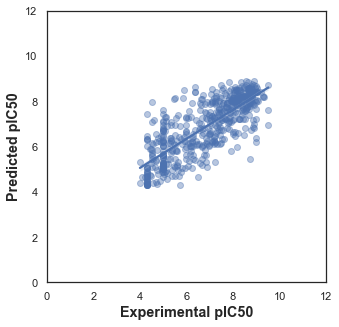

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [23]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/Users/mrinalmishra/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [24]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [26]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|███████████████████████████████████████| 42/42 [00:00<00:00, 300103.52it/s]


In [27]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.96,0.97,0.24,0.20
ExtraTreeRegressor,0.96,0.97,0.24,0.27
ExtraTreesRegressor,0.96,0.97,0.24,8.56
GaussianProcessRegressor,0.96,0.97,0.24,15.73
RandomForestRegressor,0.88,0.93,0.41,7.42
BaggingRegressor,0.85,0.91,0.46,0.87
MLPRegressor,0.84,0.90,0.47,6.34
XGBRegressor,0.84,0.90,0.47,2.59
HistGradientBoostingRegressor,0.71,0.83,0.63,15.90


In [30]:
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|███████████████████████████████████████| 42/42 [00:00<00:00, 278295.05it/s]


In [31]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,


[(0.0, 1.0)]

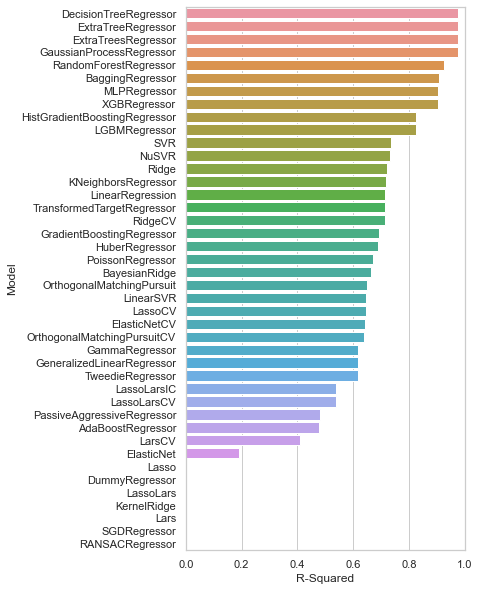

In [32]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

In [ ]:
##HDAC11

In [2]:
target = new_client.target
target_query = target.search('HDAC11')

targets = pd.DataFrame.from_dict(target_query)

In [3]:
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'Q96DB2', 'xref_name': None, 'xre...",Homo sapiens,Histone deacetylase 11,18.0,False,CHEMBL3310,"[{'accession': 'Q96DB2', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Histone deacetylase,5.0,False,CHEMBL2093865,"[{'accession': 'Q13547', 'component_descriptio...",PROTEIN FAMILY,9606
2,[],Mus musculus,Histone deacetylase,5.0,False,CHEMBL3832944,"[{'accession': 'Q8VH37', 'component_descriptio...",PROTEIN FAMILY,10090


In [4]:
selected_target = targets.target_chembl_id[0]

selected_target

'CHEMBL3310'

In [5]:
activity = new_client.activity

res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

df = pd.DataFrame.from_dict(res)

In [6]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,2099126,[],CHEMBL947929,Inhibition of HDAC11,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Histone deacetylase 11,9606,None,None,IC50,uM,UO_0000065,None,50.0
1,None,2099232,[],CHEMBL947929,Inhibition of HDAC11,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Histone deacetylase 11,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,2099258,[],CHEMBL947929,Inhibition of HDAC11,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Histone deacetylase 11,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,2099259,[],CHEMBL947929,Inhibition of HDAC11,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Histone deacetylase 11,9606,None,None,IC50,uM,UO_0000065,None,50.0
4,None,2099260,[],CHEMBL947929,Inhibition of HDAC11,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Histone deacetylase 11,9606,None,None,IC50,uM,UO_0000065,None,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,None,20667186,[],CHEMBL4619651,Inhibition of N-terminal His-tagged full lengt...,B,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Histone deacetylase 11,9606,None,None,IC50,uM,UO_0000065,None,1.0
483,None,20667187,[],CHEMBL4619651,Inhibition of N-terminal His-tagged full lengt...,B,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Histone deacetylase 11,9606,None,None,IC50,uM,UO_0000065,9.6,0.482
484,None,20689072,[],CHEMBL4625013,Inhibition of HDAC11 (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Histone deacetylase 11,9606,None,None,IC50,uM,UO_0000065,None,200.0
485,None,20692202,[],CHEMBL4625821,Inhibition of human recombinant untagged HDAC1...,A,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Histone deacetylase 11,9606,None,None,IC50,uM,UO_0000065,None,50.0


In [7]:
df.to_csv('/Users/mrinalmishra/Documents/drug_discovery/HDAC11_01_bioactivity_data_raw.csv', index=False)


In [8]:
df2 = df[df.standard_value.notna()]

df2 = df2[df.canonical_smiles.notna()]

#Extracting rows with unique canonical_smiles

len(df2.canonical_smiles.unique())

df2_nr = df2.drop_duplicates(['canonical_smiles'])

#Data pre-processing of the bioactivity data
#Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame

selection = ['molecule_chembl_id','canonical_smiles','standard_value']

df3 = df2_nr[selection]


/Users/mrinalmishra/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL269935,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,50000.0
1,CHEMBL236678,Nc1ccccc1NC(=O)c1cccnc1,50000.0
2,CHEMBL271949,Nc1ccc(-c2cccs2)cc1NC(=O)c1ccccc1,50000.0
3,CHEMBL271741,Nc1ccc(-c2ccccc2)cc1NC(=O)c1ccccc1,50000.0
4,CHEMBL405072,Nc1ccccc1NC(=O)c1ccccc1,50000.0
...,...,...,...
482,CHEMBL4633998,CCN(C(=O)c1ccc(C(=O)NO)cc1)c1cccc(C(C)(C)C)c1,1000.0
483,CHEMBL2170177,COc1ccc(Cn2ccc3ccc(C(=O)NO)cc32)cc1,482.0
484,CHEMBL1370863,CN1CCN(c2ccc([N+](=O)[O-])c(N)c2)CC1,200000.0
485,CHEMBL4641682,CN1CC(C(=O)N[C@@H](CCCCCC(=O)c2ccon2)c2ncc(-c3...,50000.0


In [10]:
df3.to_csv('/Users/mrinalmishra/Documents/drug_discovery/HDAC11_02_bioactivity_data_preprocessed.csv', index=False)

#Labeling compounds as either being active, inactive or intermediate

df4 = pd.read_csv('/Users/mrinalmishra/Documents/drug_discovery/HDAC11_02_bioactivity_data_preprocessed.csv')

bioactivity_threshold = []

for i in df4.standard_value:
    if float(i) >= 10000:
        bioactivity_threshold.append("inactive")
    elif float(i) <= 1000:
        bioactivity_threshold.append("active")
    else:
        bioactivity_threshold.append("intermediate")


bioactivity_class = pd.Series(bioactivity_threshold, name='class')

df5 = pd.concat([df4, bioactivity_class], axis=1)


In [11]:
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL269935,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,50000.0,inactive
1,CHEMBL236678,Nc1ccccc1NC(=O)c1cccnc1,50000.0,inactive
2,CHEMBL271949,Nc1ccc(-c2cccs2)cc1NC(=O)c1ccccc1,50000.0,inactive
3,CHEMBL271741,Nc1ccc(-c2ccccc2)cc1NC(=O)c1ccccc1,50000.0,inactive
4,CHEMBL405072,Nc1ccccc1NC(=O)c1ccccc1,50000.0,inactive
...,...,...,...,...
372,CHEMBL4633998,CCN(C(=O)c1ccc(C(=O)NO)cc1)c1cccc(C(C)(C)C)c1,1000.0,active
373,CHEMBL2170177,COc1ccc(Cn2ccc3ccc(C(=O)NO)cc32)cc1,482.0,active
374,CHEMBL1370863,CN1CCN(c2ccc([N+](=O)[O-])c(N)c2)CC1,200000.0,inactive
375,CHEMBL4641682,CN1CC(C(=O)N[C@@H](CCCCCC(=O)c2ccon2)c2ncc(-c3...,50000.0,inactive


In [12]:
df5.to_csv('/Users/mrinalmishra/Documents/drug_discovery/HDAC11_03_bioactivity_data_curated.csv', index=False)



###########################Exploratory data Analysis#######################
#conda install -c rdkit rdkit -y

df = pd.read_csv('/Users/mrinalmishra/Documents/drug_discovery/HDAC11_03_bioactivity_data_curated.csv')


df_no_smiles = df.drop(columns='canonical_smiles')

smiles = []

for i in df.canonical_smiles.tolist():
    cpd = str(i).split('.')
    cpd_longest = max(cpd, key = len)
    smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)


In [13]:
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL269935,50000.0,inactive,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1
1,CHEMBL236678,50000.0,inactive,Nc1ccccc1NC(=O)c1cccnc1
2,CHEMBL271949,50000.0,inactive,Nc1ccc(-c2cccs2)cc1NC(=O)c1ccccc1
3,CHEMBL271741,50000.0,inactive,Nc1ccc(-c2ccccc2)cc1NC(=O)c1ccccc1
4,CHEMBL405072,50000.0,inactive,Nc1ccccc1NC(=O)c1ccccc1
...,...,...,...,...
372,CHEMBL4633998,1000.0,active,CCN(C(=O)c1ccc(C(=O)NO)cc1)c1cccc(C(C)(C)C)c1
373,CHEMBL2170177,482.0,active,COc1ccc(Cn2ccc3ccc(C(=O)NO)cc32)cc1
374,CHEMBL1370863,200000.0,inactive,CN1CCN(c2ccc([N+](=O)[O-])c(N)c2)CC1
375,CHEMBL4641682,50000.0,inactive,CN1CC(C(=O)N[C@@H](CCCCCC(=O)c2ccon2)c2ncc(-c3...


In [14]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

def lipinski(smiles, verbose=False):
    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)
    baseData= np.arange(1,1)
    i=0
    for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
        row = np.array([desc_MolWt,desc_MolLogP,desc_NumHDonors,desc_NumHAcceptors])
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    return descriptors

df_lipinski = lipinski(df_clean_smiles.canonical_smiles)

df_combined = pd.concat([df,df_lipinski], axis=1)

In [15]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL269935,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,50000.0,inactive,289.334,4.3115,2.0,2.0
1,CHEMBL236678,Nc1ccccc1NC(=O)c1cccnc1,50000.0,inactive,213.240,1.9161,2.0,3.0
2,CHEMBL271949,Nc1ccc(-c2cccs2)cc1NC(=O)c1ccccc1,50000.0,inactive,294.379,4.2496,2.0,3.0
3,CHEMBL271741,Nc1ccc(-c2ccccc2)cc1NC(=O)c1ccccc1,50000.0,inactive,288.350,4.1881,2.0,2.0
4,CHEMBL405072,Nc1ccccc1NC(=O)c1ccccc1,50000.0,inactive,212.252,2.5211,2.0,2.0
...,...,...,...,...,...,...,...,...
372,CHEMBL4633998,CCN(C(=O)c1ccc(C(=O)NO)cc1)c1cccc(C(C)(C)C)c1,1000.0,active,340.423,3.7698,2.0,3.0
373,CHEMBL2170177,COc1ccc(Cn2ccc3ccc(C(=O)NO)cc32)cc1,482.0,active,296.326,2.8172,2.0,4.0
374,CHEMBL1370863,CN1CCN(c2ccc([N+](=O)[O-])c(N)c2)CC1,200000.0,inactive,236.275,0.9288,1.0,5.0
375,CHEMBL4641682,CN1CC(C(=O)N[C@@H](CCCCCC(=O)c2ccon2)c2ncc(-c3...,50000.0,inactive,453.518,3.7561,2.0,6.0


In [16]:
import numpy as np

def pIC50(input):
    pIC50 = []
    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))
    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
    return x
#Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative

def norm_value(input):
    norm = []
    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)
    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
    return x

df_norm = norm_value(df_combined)

df_final = pIC50(df_norm)

df_final.to_csv('/Users/mrinalmishra/Documents/drug_discovery/HDAC11_bioactivity_data_3class_pIC50.csv')

/Users/mrinalmishra/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/Users/mrinalmishra/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


In [17]:
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL269935,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,inactive,289.334,4.3115,2.0,2.0,4.301030
1,CHEMBL236678,Nc1ccccc1NC(=O)c1cccnc1,inactive,213.240,1.9161,2.0,3.0,4.301030
2,CHEMBL271949,Nc1ccc(-c2cccs2)cc1NC(=O)c1ccccc1,inactive,294.379,4.2496,2.0,3.0,4.301030
3,CHEMBL271741,Nc1ccc(-c2ccccc2)cc1NC(=O)c1ccccc1,inactive,288.350,4.1881,2.0,2.0,4.301030
4,CHEMBL405072,Nc1ccccc1NC(=O)c1ccccc1,inactive,212.252,2.5211,2.0,2.0,4.301030
...,...,...,...,...,...,...,...,...
372,CHEMBL4633998,CCN(C(=O)c1ccc(C(=O)NO)cc1)c1cccc(C(C)(C)C)c1,active,340.423,3.7698,2.0,3.0,6.000000
373,CHEMBL2170177,COc1ccc(Cn2ccc3ccc(C(=O)NO)cc32)cc1,active,296.326,2.8172,2.0,4.0,6.316953
374,CHEMBL1370863,CN1CCN(c2ccc([N+](=O)[O-])c(N)c2)CC1,inactive,236.275,0.9288,1.0,5.0,3.698970
375,CHEMBL4641682,CN1CC(C(=O)N[C@@H](CCCCCC(=O)c2ccon2)c2ncc(-c3...,inactive,453.518,3.7561,2.0,6.0,4.301030


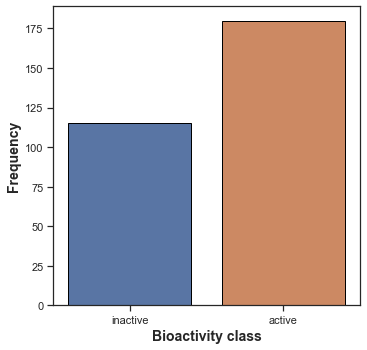

In [18]:
df_2class = df_final[df_final['class'] != 'intermediate']

#Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')

plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('/Users/mrinalmishra/Documents/drug_discovery/plot_HDAC11_bioactivity_class.pdf')


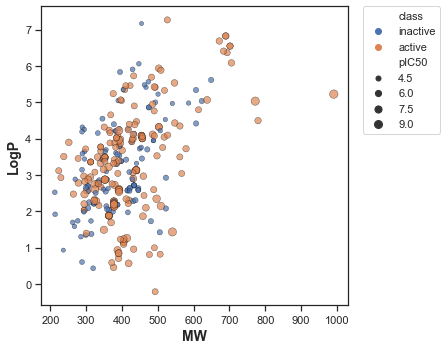

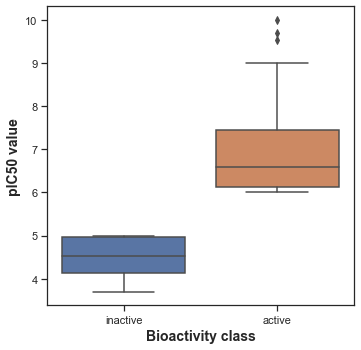

In [19]:
#Scatter plot of MW versus LogP
#It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')

plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.savefig('/Users/mrinalmishra/Documents/drug_discovery/plot_HDAC11_MW_vs_LogP.pdf')

#Box plots
#pIC50 value

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')

plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('/Users/mrinalmishra/Documents/drug_discovery/plot_HDAC11_plot_ic50.pdf')


In [20]:
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL269935,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,inactive,289.334,4.3115,2.0,2.0,4.301030
1,CHEMBL236678,Nc1ccccc1NC(=O)c1cccnc1,inactive,213.240,1.9161,2.0,3.0,4.301030
2,CHEMBL271949,Nc1ccc(-c2cccs2)cc1NC(=O)c1ccccc1,inactive,294.379,4.2496,2.0,3.0,4.301030
3,CHEMBL271741,Nc1ccc(-c2ccccc2)cc1NC(=O)c1ccccc1,inactive,288.350,4.1881,2.0,2.0,4.301030
4,CHEMBL405072,Nc1ccccc1NC(=O)c1ccccc1,inactive,212.252,2.5211,2.0,2.0,4.301030
...,...,...,...,...,...,...,...,...
372,CHEMBL4633998,CCN(C(=O)c1ccc(C(=O)NO)cc1)c1cccc(C(C)(C)C)c1,active,340.423,3.7698,2.0,3.0,6.000000
373,CHEMBL2170177,COc1ccc(Cn2ccc3ccc(C(=O)NO)cc32)cc1,active,296.326,2.8172,2.0,4.0,6.316953
374,CHEMBL1370863,CN1CCN(c2ccc([N+](=O)[O-])c(N)c2)CC1,inactive,236.275,0.9288,1.0,5.0,3.698970
375,CHEMBL4641682,CN1CC(C(=O)N[C@@H](CCCCCC(=O)c2ccon2)c2ncc(-c3...,inactive,453.518,3.7561,2.0,6.0,4.301030


In [21]:
#Statistical analysis | Mann-Whitney U Test
#https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/

def mannwhitney(descriptor, verbose=False):
    from numpy.random import seed
    from numpy.random import randn
    from scipy.stats import mannwhitneyu
    seed(1)# seed the random number generator
    selection = [descriptor, 'class']# actives and inactives
    df = df_2class[selection]
    active = df[df['class'] == 'active']
    active = active[descriptor]
    selection = [descriptor, 'class']
    df = df_2class[selection]
    inactive = df[df['class'] == 'inactive']
    inactive = inactive[descriptor]
    stat, p = mannwhitneyu(active, inactive)# compare samples
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05 # interpret
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'
    results = pd.DataFrame({'Descriptor':descriptor,'Statistics':stat,'p':p,'alpha':alpha,'Interpretation':interpretation}, index=[0])
    filename = '/Users/mrinalmishra/Documents/drug_discovery/HDAC11_' + 'mannwhitneyu_' + descriptor + '.csv'
    results.to_csv(filename)
    return results

mannwhitney('pIC50')

Statistics=20700.000, p=0.000


,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,20700.0,1.167469e-47,0.05,Different distribution (reject H0)


Statistics=11568.000, p=0.088


,Descriptor,Statistics,p,alpha,Interpretation
0,MW,11568.0,0.088408,0.05,Same distribution (fail to reject H0)


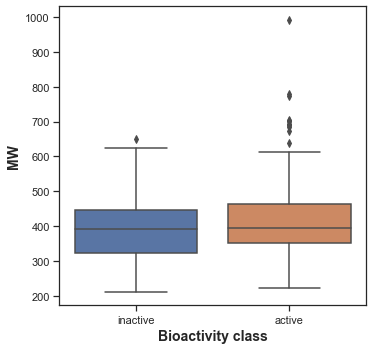

In [22]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')

plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('/Users/mrinalmishra/Documents/drug_discovery/HDAC11_plot_MW.pdf')

mannwhitney('MW')

Statistics=10834.000, p=0.499


,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,10834.0,0.498633,0.05,Same distribution (fail to reject H0)


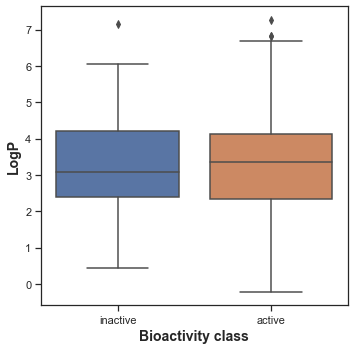

In [23]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')

plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('/Users/mrinalmishra/Documents/drug_discovery/HDAC11_plot_LogP.pdf')

mannwhitney('LogP')

Statistics=12341.000, p=0.003


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,12341.0,0.003067,0.05,Different distribution (reject H0)


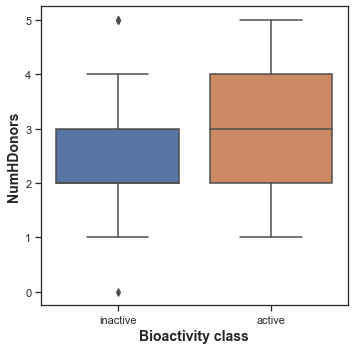

In [24]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')

plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('/Users/mrinalmishra/Documents/drug_discovery/HDAC11_plot_NumHDonors.pdf')

mannwhitney('NumHDonors')


Statistics=8605.000, p=0.013


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,8605.0,0.012558,0.05,Different distribution (reject H0)


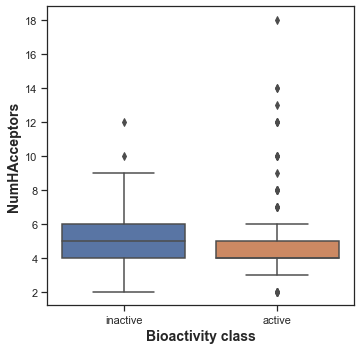

In [25]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')

plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('/Users/mrinalmishra/Documents/drug_discovery/HDAC11_plot_NumHAcceptors.pdf')

mannwhitney('NumHAcceptors')